###### First we'll import all the basic libraries like numpy for numeric python,pandas for data manipulation and matplotlib and seaborn for data visualizationFirst we'll import all the basic libraries like numpy for numeric python,pandas for data manipulation and matplotlib and seaborn for data visualization

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###### Will import the csv file directly from the url to read the dataset

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Now we have got our final data frame.This data frame is consist of 8523 rows and 12 columns and all of these columns are having float data type except the S.N. which is in Integer form. As we have to build a predictive model and find out the sales of each product at a particular store,since the sales figure are in float format hence will use regression model to predict the same

### EDA Process

In [3]:
df_train.shape

(8523, 12)

In [4]:
print(df_train.shape[0])
print(df_train.shape[1])

8523
12


In [5]:
df_train.ndim

2

In [6]:
df_train.size

102276

In [7]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
df_train.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3623,NCK18,9.6,Low Fat,0.006725,Household,165.9184,OUT018,2009,Medium,Tier 3,Supermarket Type2,2972.1312


In [10]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df_train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [15]:
df_train.isnull().any().any()

True

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Null values are present in Item_Weight and Outlet_Size columns

In [17]:
df_train.isnull().sum().sum()

3873

total null values are 3873

In [12]:
print(df_train.Item_Fat_Content.unique())
print(df_train.Item_Fat_Content.value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [84]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(df_train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Will replace the similar look a like one with the orginal classes. Low Fat contents are highly distributed in this data frame

In [85]:
print(df_train.Item_Identifier.unique())
print(df_train.Item_Identifier.value_counts())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


In [86]:
print(df_train.Item_Type.unique())
print(df_train.Item_Type.value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


There are different items are avialbale at different outlets

In [87]:
print(df_train.Outlet_Identifier.unique())
print(df_train.Outlet_Identifier.value_counts())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [88]:
print(df_train.Outlet_Size.unique())
print(df_train.Outlet_Size.value_counts())

['Medium' nan 'High' 'Small']
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Medium size outlet has more presence in the market

In [89]:
print(df_train.Outlet_Location_Type.unique())
print(df_train.Outlet_Location_Type.value_counts())

['Tier 1' 'Tier 3' 'Tier 2']
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Tier 3 has more outlet presence unlike others

In [90]:
print(df_train.Outlet_Type.unique())
print(df_train.Outlet_Type.value_counts())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Outlets are broadly in the form of Supermarket Type1

### Data Visualization

##### 1.Countplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

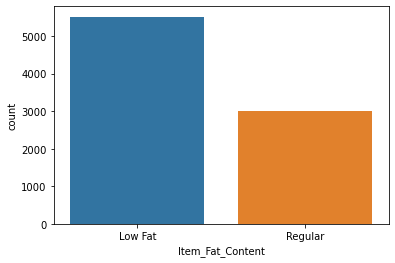

In [91]:
sns.countplot(df_train.Item_Fat_Content)

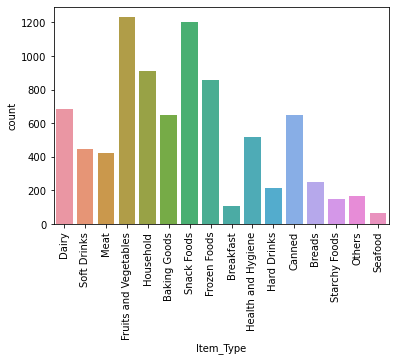

In [92]:
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)
plt.show()

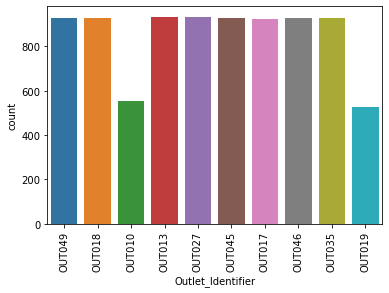

In [93]:
sns.countplot(df_train.Outlet_Identifier)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

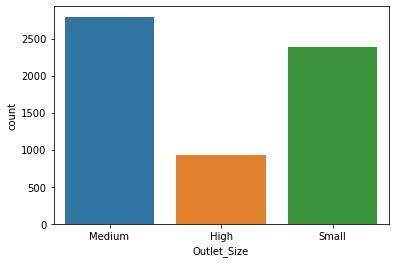

In [94]:
sns.countplot(df_train.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

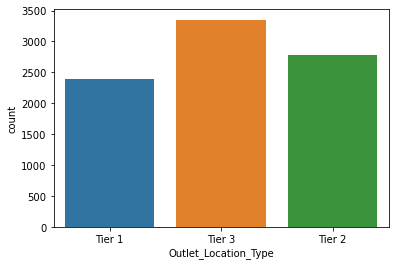

In [95]:
sns.countplot(df_train.Outlet_Location_Type)

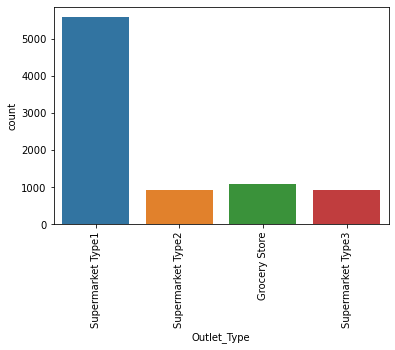

In [96]:
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=90)
plt.show()

##### 2.Scatterploting

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

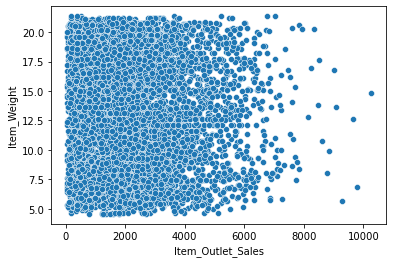

In [97]:
sns.scatterplot(df_train.Item_Outlet_Sales,df_train.Item_Weight)

items regardless of its weight  producing sales b/w 0-5000

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

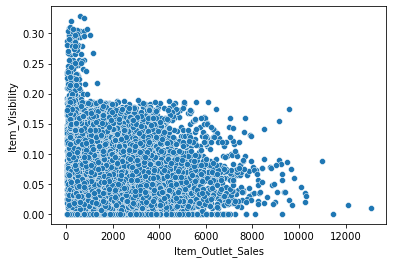

In [98]:
sns.scatterplot(df_train.Item_Outlet_Sales,df_train.Item_Visibility)

Items having visibility b/w 0-0.18 are producing sales b/w 0-6000

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

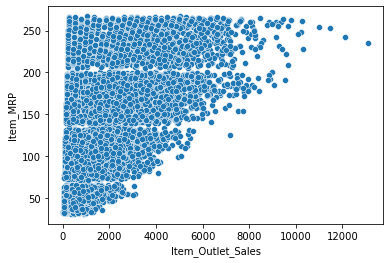

In [99]:
sns.scatterplot(df_train.Item_Outlet_Sales,df_train.Item_MRP)

There is a positive correlation b/w sales and MRP i.e. the more the MRP is the chance of getting selling the items are more hence sales will increase

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Establishment_Year'>

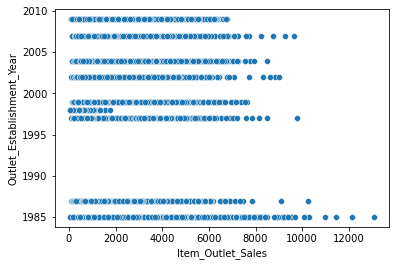

In [100]:
sns.scatterplot(df_train.Item_Outlet_Sales,df_train.Outlet_Establishment_Year)

Outlet establishment year is producing less impact on sales

##### 3.Histogram Ploting

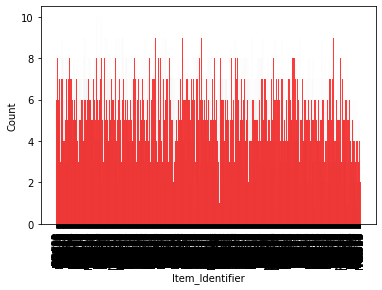

In [102]:
sns.histplot(df_train.Item_Identifier,color='RED')
plt.xticks(rotation=90)
plt.show()

Almost Equal distribution is there

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

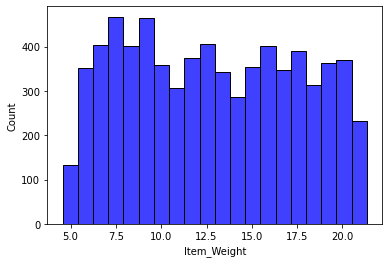

In [103]:
sns.histplot(df_train.Item_Weight,color='b')

Items having weight 7.5 and 10 have count 400,which shows that outlets are commonly having these weights unlike others

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

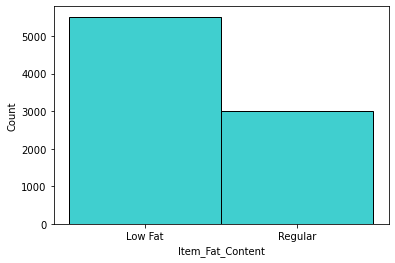

In [104]:
sns.histplot(df_train.Item_Fat_Content,color='c')

Outlets are having more low fat content items rather than Regular one

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

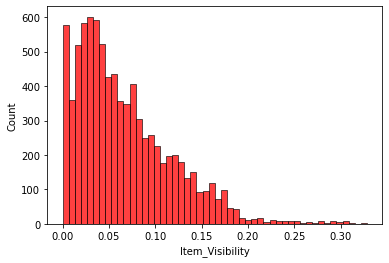

In [105]:
sns.histplot(df_train.Item_Visibility,color='r')

The more the item visibility less the count or presence at the outlets

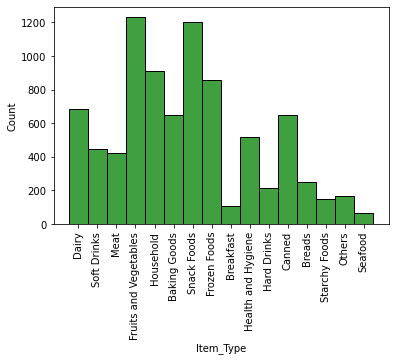

In [106]:
sns.histplot(df_train.Item_Type,color='g')
plt.xticks(rotation=90)
plt.show()

Fruits and vegetables and Snack Foods are present in high numbers at almost each outlets

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

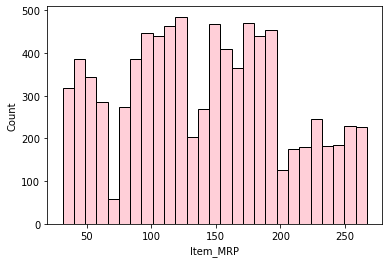

In [107]:
sns.histplot(df_train.Item_MRP,color='pink')

Item having MRP b/w 100-200 are present at the outlets in large numbers

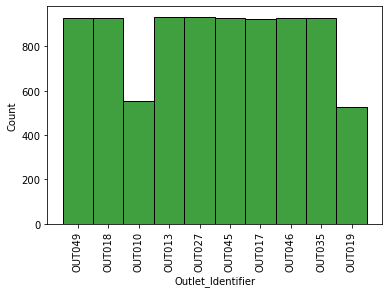

In [108]:
sns.histplot(df_train.Outlet_Identifier,color='g')
plt.xticks(rotation=90)
plt.show()

Almost every outlet identifier has equally distribution except outliers 018 and 019

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Count'>

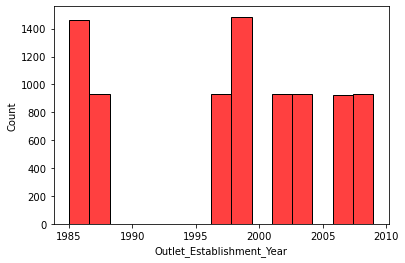

In [109]:
sns.histplot(df_train.Outlet_Establishment_Year,color='r')

In 1985 and 2000 the outlet distributions are more as compare to others

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

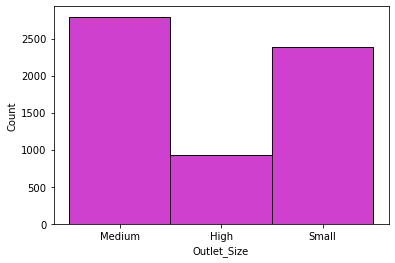

In [110]:
sns.histplot(df_train.Outlet_Size,color='m')

Medium size Outliers have more presence as compare to others 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Count'>

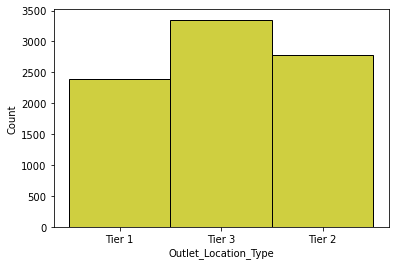

In [124]:
sns.histplot(df_train.Outlet_Location_Type,color='y')

Tier3 city has more outliers presence

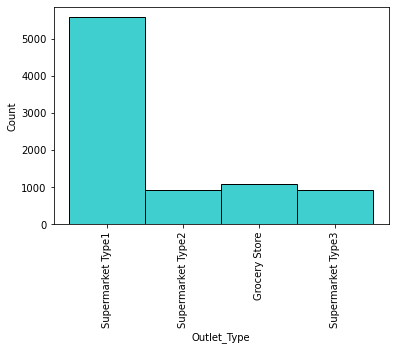

In [112]:
sns.histplot(df_train.Outlet_Type,color='c')
plt.xticks(rotation=90)
plt.show()

Outliers are mostly presence in the form of Supermarket Type1

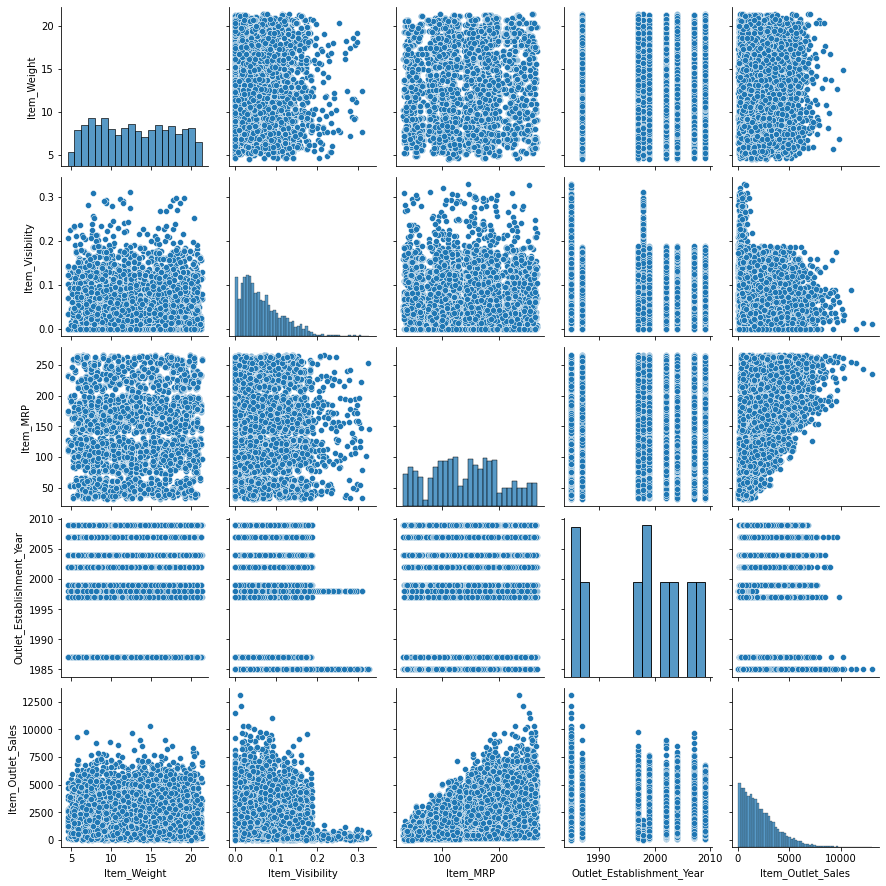

In [125]:
sns.pairplot(df_train)

##### I have already briefly explained about all the Plotings earlier

### Removing Null Value

In [3]:
import sklearn
from sklearn.impute import SimpleImputer

df_train.Item_Weight=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df_train.Item_Weight.values.reshape(-1,1))
df_train.Outlet_Size=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df_train.Outlet_Size.values.reshape(-1,1))

In [4]:
print(df_train.isnull().sum())
print('\n')
print('Total null values=',df_train.isnull().sum().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Total null values= 0


This shows that Null values are successfully replaced by mean and mode value

### Encoder

now,will use encoder method to convert all the category string data into numeric data set

In [7]:
from sklearn.preprocessing import LabelEncoder
l=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in l:
    df_train[i]=LabelEncoder().fit_transform(df_train[i]) 

In [8]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [134]:
df_train.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

Here we have successfully changed all the string data types in to numeric data types

In [138]:
print(df_train.Item_Visibility.unique())
print(df_train.Item_Visibility.value_counts())

[0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


### Descriptive Statistics

In [135]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Here I've transposed the data frame to do the analysis more better

In [136]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,8523.0,779.714889,449.222377,0.000,395.500000,783.000000,1167.000000,1558.000000
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,1.369354,0.644810,0.000,1.000000,1.000000,2.000000,4.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,8523.0,4.722281,2.837201,0.000,2.000000,5.000000,7.000000,9.000000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000


Since Item_Outlet_Sales is the target variable and 'Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type'& 'Outlet_Type' are the object attributes hence will not touch these and do the analysis on the remaining features.As we can see that mean of each attributes is less as compare to median of the respective attributes except variable Item_MRP and Outlet_Establishment_Year hence there can be the possibility that outliers may be present. Also, in the Item_MRP column the difference b/w the max value and the 3rd interquartile(IQR) is too big as compare to that of min value and 1st IQR and 1stIQR and 2nd IQR hence skewness might also come into the picture later

###### Heatmap Representation of Descriptive Statistics

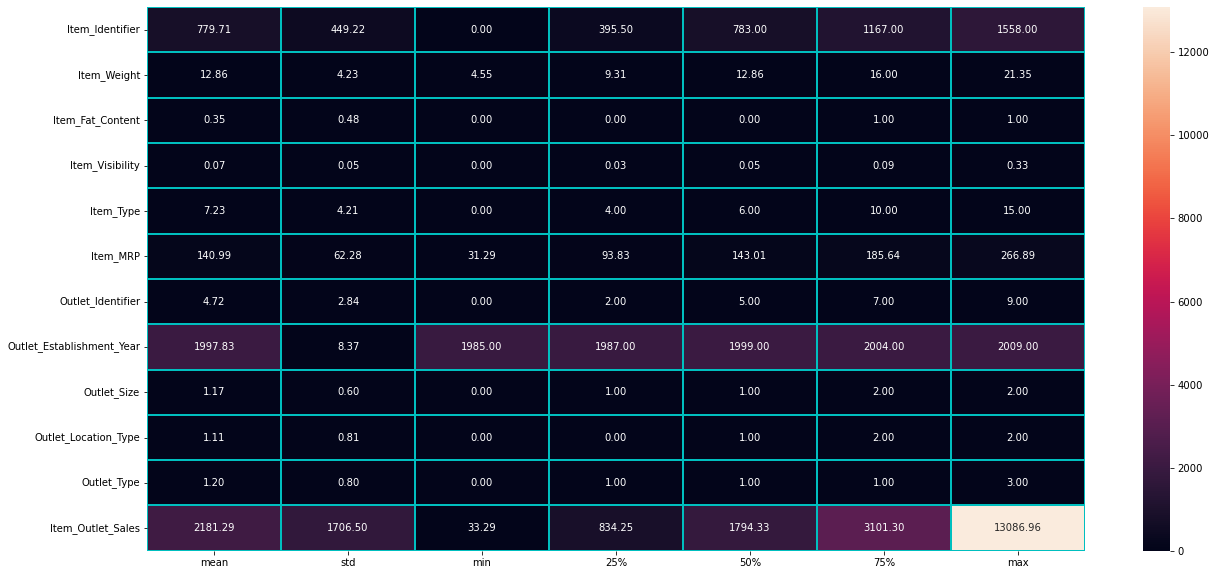

In [53]:
plt.figure(figsize=(21,10))
sns.heatmap(df_train.describe()[1:].T,annot=True,linecolor='c',linewidth=0.2,fmt='0.2f')
plt.savefig('mart_heatmap.png')
plt.show()

### Correlation

In [54]:
df_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [55]:
df_train.corr().Item_Outlet_Sales.sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

Will try to remove all the negative correlative columns w.r.t. Item_Outlet_Sales and they are Item_Visibility & Outlet_Establishment_Year and rest are categorical object hence will not touch them

##### Heatmap Representation of Correlation

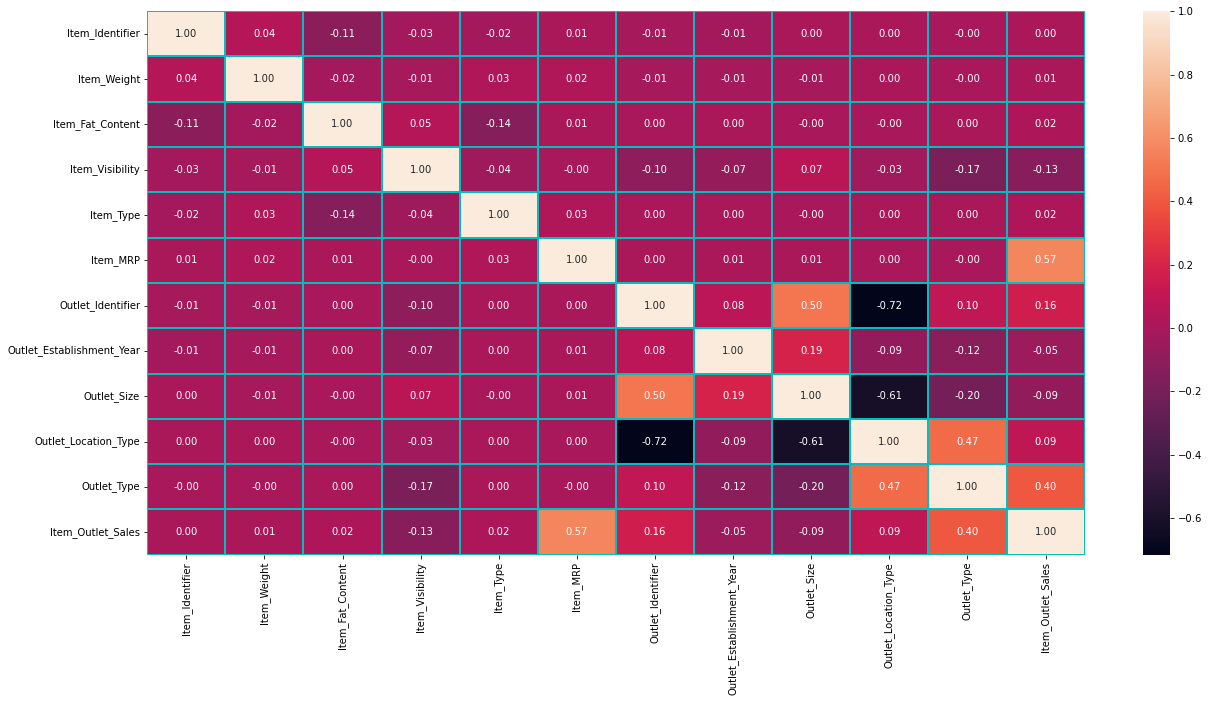

In [56]:
plt.figure(figsize=(21,10))
sns.heatmap(df_train.corr(),annot=True,linecolor='c',linewidth=0.2,fmt='0.2f')
plt.savefig('martcorr_heatmap.png')
plt.show()

### Multicollinearity

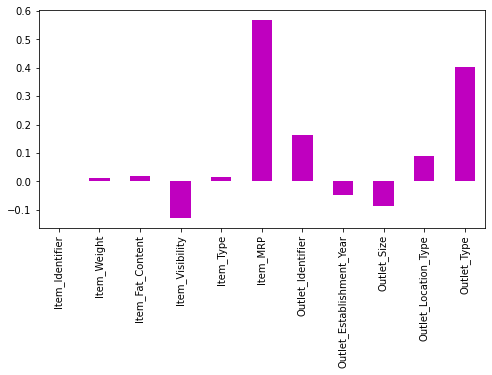

In [57]:
plt.figure(figsize=(8,4))
df_train.corr().Item_Outlet_Sales.drop(['Item_Outlet_Sales']).plot(kind='bar',color='m')
plt.savefig('mart_multicor_heatmap.png')
plt.show()

Will check the possibility of multicollinearity in the next part while removing the correlation and if it exist will remove it after removing the negative correlated variables

### Skewness

In [58]:
df_train.skew().sort_values()

Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Size                 -0.087072
Outlet_Identifier           -0.059861
Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Fat_Content             0.616705
Outlet_Type                  0.927438
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

Let's assume the Threshold value for skewness is +/-0.5. As we can see that column Item_Visibility has more skewness as compare to others(we will not apply the threshold value onto the Target variable and object variables).Since skewness is +ve hence curve will get skewed right side.Hence, will remove the skewness later on once will reach to the data cleansing model.

##### Distribution Ploting to check the Normal Distribution

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

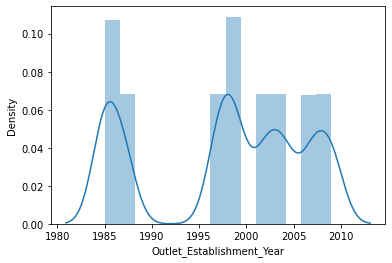

In [59]:
sns.distplot(df_train.Outlet_Establishment_Year)

left skewed distribution

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

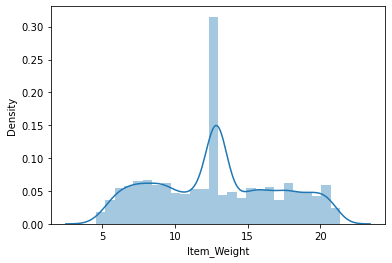

In [60]:
sns.distplot(df_train.Item_Weight)

Very slight right skewed distribution

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

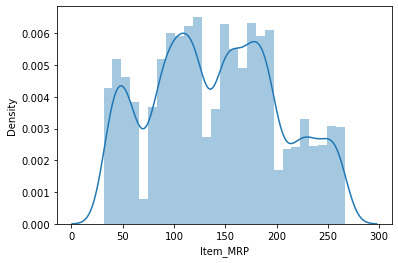

In [61]:
sns.distplot(df_train.Item_MRP)

Right skewed distribution

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

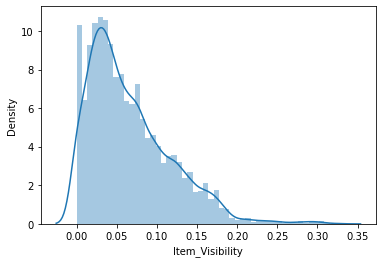

In [62]:
sns.distplot(df_train.Item_Visibility)

Right skewed distribution

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

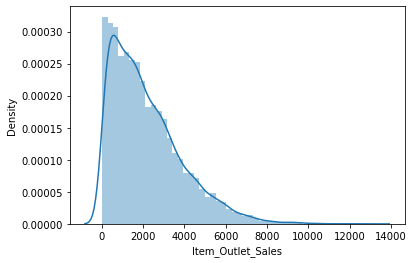

In [63]:
sns.distplot(df_train.Item_Outlet_Sales)

Right skewed distribution

As,we can see that not a single variable is equally distributed along the axis i.e. it's getting skewed to the either sides of the curve and we're not getting the ideal condition of Normally distributed curve where the mean is equal to zero and standard deviation is at 1.Hence will remove the skewness in the next part of Data Cleansing and make it transform to standard form so that ideal condition could be met.

### Outliers

#####  Visualization with Boxplot

<Figure size 792x576 with 0 Axes>

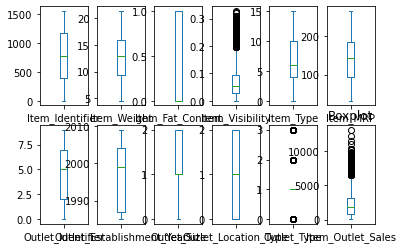

In [64]:
plt.figure(figsize=(11,8))
df_train.plot(kind='box',subplots=True,layout=(2,6))
plt.title('Boxplot')
plt.xticks(rotation=0)
plt.savefig('box.png')
plt.show()

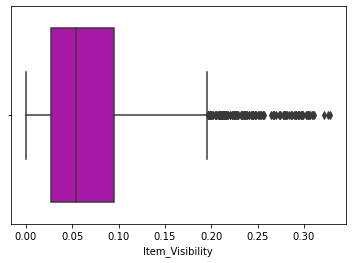

In [65]:
sns.boxplot(df_train.Item_Visibility,color='m')
plt.show()

It shows that the columns Item Visibility can have outliers,so will check it and remove incase it is present

In [13]:
z=np.abs(zscore(df_train))
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [78]:
z.iloc[49]

Item_Identifier              0.198766
Item_Weight                  0.000000
Item_Fat_Content             0.978092
Item_Visibility              3.668255
Item_Type                    0.766479
Item_MRP                     0.897468
Outlet_Identifier            0.254590
Outlet_Establishment_Year    1.532846
Outlet_Size                  1.381274
Outlet_Location_Type         1.369334
Outlet_Type                  1.508289
Item_Outlet_Sales            0.821010
Name: 49, dtype: float64

In [79]:
z.iloc[49,3]

3.668255029958881

It shows that most of the rows and columns are having outliers

### Data Cleansing

##### Removing negative collinearity

In [9]:
df=df_train.drop(['Item_Visibility','Outlet_Establishment_Year'],axis=1)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,4,249.8092,9,1,0,1,3735.1380
1,8,5.920,2,14,48.2692,3,1,2,2,443.4228
2,662,17.500,1,10,141.6180,9,1,0,1,2097.2700
3,1121,19.200,2,6,182.0950,0,1,2,0,732.3800
4,1297,8.930,1,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,13,214.5218,1,0,2,1,2778.3834
8519,897,8.380,2,0,108.1570,7,1,1,1,549.2850
8520,1357,10.600,1,8,85.1224,6,2,1,1,1193.1136
8521,681,7.210,2,13,103.1332,3,1,2,2,1845.5976


Though,We have lost 2 columns in the process

In [10]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,4,249.8092,9,1,0,1
1,8,5.920,2,14,48.2692,3,1,2,2
2,662,17.500,1,10,141.6180,9,1,0,1
3,1121,19.200,2,6,182.0950,0,1,2,0
4,1297,8.930,1,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,13,214.5218,1,0,2,1
8519,897,8.380,2,0,108.1570,7,1,1,1
8520,1357,10.600,1,8,85.1224,6,2,1,1
8521,681,7.210,2,13,103.1332,3,1,2,2


### Checking Negative Multicollinearity

In [11]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    print(df1)

In [72]:
vif()

               Features        VIF
0       Item_Identifier   3.846652
1           Item_Weight   8.656496
2      Item_Fat_Content   1.553141
3             Item_Type   3.815401
4              Item_MRP   5.667785
5     Outlet_Identifier  10.296345
6           Outlet_Size   6.317958
7  Outlet_Location_Type   8.947707
8           Outlet_Type   7.329127


We can see Item_Identifier and Item_Type, Item_Weight and Outlet_Location_Type are two pairs giving almost same information to the target variable,Ergo will drop Item_Identifier and Item_Weight as its have almost zero correlation with target variable.
#Note here i'm dropping the object column since it is not that useful as i have analysis the relation with the help of data visualization earlier in this sheet.

In [103]:
df5=df.drop(['Item_Identifier','Item_Weight'],axis=1)
df5

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,4,249.8092,9,1,0,1,3735.1380
1,2,14,48.2692,3,1,2,2,443.4228
2,1,10,141.6180,9,1,0,1,2097.2700
3,2,6,182.0950,0,1,2,0,732.3800
4,1,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,214.5218,1,0,2,1,2778.3834
8519,2,0,108.1570,7,1,1,1,549.2850
8520,1,8,85.1224,6,2,1,1,1193.1136
8521,2,13,103.1332,3,1,2,2,1845.5976


Now we have lost two more columns in this process

### Removing Outliers

In [104]:
df2=df5[(z<3).all(axis=1)]
df2

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,4,249.8092,9,1,0,1,3735.1380
1,2,14,48.2692,3,1,2,2,443.4228
2,1,10,141.6180,9,1,0,1,2097.2700
3,2,6,182.0950,0,1,2,0,732.3800
4,1,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,1,13,214.5218,1,0,2,1,2778.3834
8519,2,0,108.1570,7,1,1,1,549.2850
8520,1,8,85.1224,6,2,1,1,1193.1136
8521,2,13,103.1332,3,1,2,2,1845.5976


In [15]:
percentage_loss=(8523-8222)*100/8523
percentage_loss

3.5316203214830457

As the percentage loss is only 4% & which is still very less than 10% of our threshold value hence we can say that we are moving in the right direction on building our model and doing prediction as almost all the data has been maintained till now.

### Removing Skewness

In [16]:
from sklearn.preprocessing import power_transform

In [105]:
x=df2.drop(['Item_Outlet_Sales'],axis=1)
x

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,249.8092,9,1,0,1
1,2,14,48.2692,3,1,2,2
2,1,10,141.6180,9,1,0,1
3,2,6,182.0950,0,1,2,0
4,1,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...
8518,1,13,214.5218,1,0,2,1
8519,2,0,108.1570,7,1,1,1
8520,1,8,85.1224,6,2,1,1
8521,2,13,103.1332,3,1,2,2


In [106]:
y=df2['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [107]:
x=power_transform(x)
x

array([[-0.55319135, -0.71621389,  1.64112176, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [ 1.1617017 ,  1.50858306, -1.59302569, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135,  0.6840025 ,  0.09617342, ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [-0.55319135,  0.24491587, -0.85859194, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [ 1.1617017 ,  1.30805716, -0.537346  , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135,  1.50858306, -1.0394109 , ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [108]:
df2.skew().sort_values()

Outlet_Location_Type   -0.202794
Outlet_Size            -0.089519
Outlet_Identifier      -0.067611
Item_Type               0.094578
Item_MRP                0.139153
Item_Fat_Content        0.291106
Item_Outlet_Sales       0.877476
Outlet_Type             0.957163
dtype: float64

Now the skewness has been almost removed with the help of power_transform method and in the next line we'll transform it into standard form to attain its ideal condition of normal distribution where mean would be at 0 and std would be at 1

### StandardScaler

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [110]:
x=sc.fit_transform(x)
x

array([[-0.55319135, -0.71621389,  1.64112176, ..., -0.28893369,
        -1.37620889, -0.13508106],
       [ 1.1617017 ,  1.50858306, -1.59302569, ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135,  0.6840025 ,  0.09617342, ..., -0.28893369,
        -1.37620889, -0.13508106],
       ...,
       [-0.55319135,  0.24491587, -0.85859194, ...,  1.39061522,
        -0.1266511 , -0.13508106],
       [ 1.1617017 ,  1.30805716, -0.537346  , ..., -0.28893369,
         1.0952949 ,  1.05485046],
       [-0.55319135,  1.50858306, -1.0394109 , ...,  1.39061522,
        -1.37620889, -0.13508106]])

In [111]:
x.mean()

1.5848754856865355e-17

In [112]:
x.std()

1.0

<AxesSubplot:ylabel='Density'>

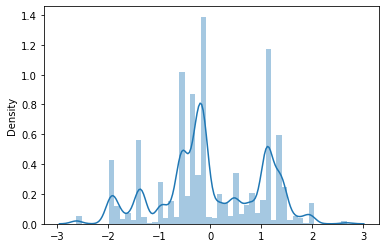

In [113]:
sns.distplot(x)

Since,We are getting mean as almost zero and std as 1, which shows that our feature variables has transformed into the standard form where the normal distribution condition is now applicable.

##### Now before going to the training and testing phase will find out x_train,y_train value for the training as we are not going to use train_test_split method because we have to predict the model accuracy with the help of other test csv file that we'll import in the next step

In [114]:
#x_train
x_train=x
print(x_train)
print('\n')
print(x_train.shape)

[[-0.55319135 -0.71621389  1.64112176 ... -0.28893369 -1.37620889
  -0.13508106]
 [ 1.1617017   1.50858306 -1.59302569 ... -0.28893369  1.0952949
   1.05485046]
 [-0.55319135  0.6840025   0.09617342 ... -0.28893369 -1.37620889
  -0.13508106]
 ...
 [-0.55319135  0.24491587 -0.85859194 ...  1.39061522 -0.1266511
  -0.13508106]
 [ 1.1617017   1.30805716 -0.537346   ... -0.28893369  1.0952949
   1.05485046]
 [-0.55319135  1.50858306 -1.0394109  ...  1.39061522 -1.37620889
  -0.13508106]]


(8222, 7)


In [115]:
#y_train
y_train=y
print(y_train)
print('\n')
print(y_train.shape)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64


(8222,)


#### Now will Import the Test dataset

In [84]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


###### This dataset has 5681 rows and 11 columns which is exactly similar to the df_train data frame in terms of its constructions but the only difference is that this dataframe doesn't have the target variable like the df_train dataframe does.It means that this is the data frame of features variables only.Also,since this model has null value,categorical objects then will construct the final dataframe as same like we did earlier in first train data frame.Hence I'll not going to explain all the EDA,Encoding,Data Cleansing and feature engineering techniques once again.One more thing we have to notice throughout this process is removing the same columns so that we would get the same attributes in both the data frame and by doing so we can fit the model first and later on will make the prediction

In [161]:
print('Shape is-',df_test.shape)
print('Rows are-',df_test.shape[0])
print('Columns are-',df_test.shape[1])

Shape is- (5681, 11)
Rows are- 5681
Columns are- 11


In [158]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [85]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(df_test['Item_Fat_Content'].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [29]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Null Values Replacing with Mean/Mode

In [86]:
df_test.Item_Weight=SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(df_test.Item_Weight.values.reshape(-1,1))
df_test.Outlet_Size=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df_test.Outlet_Size.values.reshape(-1,1))

In [31]:
print(df_test.isnull().sum())
print('\n')
print('Total null values=',df_test.isnull().sum().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


Total null values= 0


### Encoder Technique

In [87]:
l=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in l:
    df_test[i]=LabelEncoder().fit_transform(df_test[i].astype(str)) 

In [88]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


##### Removing Negative Collinearity so that we can get the same attributes in this dataframe as well

In [89]:
df3=df_test.drop(['Item_Visibility','Outlet_Establishment_Year','Item_Identifier','Item_Weight'],axis=1)
df3

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,107.8622,9,1,0,1
1,1,4,87.3198,2,1,1,1
2,0,11,241.7538,0,1,2,0
3,0,13,155.0340,2,1,1,1
4,1,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...
5676,1,13,141.3154,8,2,0,1
5677,1,15,169.1448,3,1,2,2
5678,0,8,118.7440,7,1,1,1
5679,1,3,214.6218,2,1,1,1


In [90]:
z1=np.abs(zscore(df3))
np.where(z1>3)

(array([], dtype=int64), array([], dtype=int64))

##### No outliers are present

In [92]:
df4=df3[(z1<3).all(axis=1)]
df4

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,107.8622,9,1,0,1
1,1,4,87.3198,2,1,1,1
2,0,11,241.7538,0,1,2,0
3,0,13,155.0340,2,1,1,1
4,1,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...
5676,1,13,141.3154,8,2,0,1
5677,1,15,169.1448,3,1,2,2
5678,0,8,118.7440,7,1,1,1
5679,1,3,214.6218,2,1,1,1


In [93]:
x_test=df4
x_test

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,107.8622,9,1,0,1
1,1,4,87.3198,2,1,1,1
2,0,11,241.7538,0,1,2,0
3,0,13,155.0340,2,1,1,1
4,1,4,234.2300,5,1,2,3
...,...,...,...,...,...,...,...
5676,1,13,141.3154,8,2,0,1
5677,1,15,169.1448,3,1,2,2
5678,0,8,118.7440,7,1,1,1
5679,1,3,214.6218,2,1,1,1


### Removing Skewness

In [95]:
x_test=power_transform(x_test)
x_test

array([[-0.74081066,  1.33394433, -0.49625497, ..., -0.27208263,
        -1.32078204, -0.1114561 ],
       [ 1.34987258, -0.73037407, -0.84477636, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [-0.74081066,  0.89038401,  1.56997627, ..., -0.27208263,
         1.12289083, -1.94797701],
       ...,
       [-0.74081066,  0.21019695, -0.31728058, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [ 1.34987258, -0.98006521,  1.17189104, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [ 1.34987258, -0.98006521, -0.97695029, ..., -0.27208263,
        -0.21806584, -0.1114561 ]])

### Transforming into StandardScaler form

In [96]:
x_test=sc.fit_transform(x_test)
x_test

array([[-0.74081066,  1.33394433, -0.49625497, ..., -0.27208263,
        -1.32078204, -0.1114561 ],
       [ 1.34987258, -0.73037407, -0.84477636, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [-0.74081066,  0.89038401,  1.56997627, ..., -0.27208263,
         1.12289083, -1.94797701],
       ...,
       [-0.74081066,  0.21019695, -0.31728058, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [ 1.34987258, -0.98006521,  1.17189104, ..., -0.27208263,
        -0.21806584, -0.1114561 ],
       [ 1.34987258, -0.98006521, -0.97695029, ..., -0.27208263,
        -0.21806584, -0.1114561 ]])

In [97]:
x_test.mean()

3.037500064858225e-18

In [98]:
x_test.std()

1.0

<AxesSubplot:ylabel='Density'>

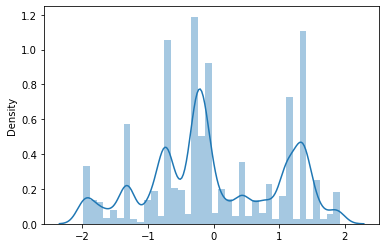

In [99]:
sns.distplot(x_test)

In [102]:
x_test.shape

(5681, 7)

### Training and Testing Phase

In [116]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

In [117]:
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print(f'Training Accuracy Score is = {lr.score(x_train,y_train)}')

Training Accuracy Score is = 0.5149421246732194


###### Now will move forward and check the Training Score for all other models as well

In [118]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
en=ElasticNet()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [119]:
def model(m):
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy Score of {m} is = {m.score(x_train,y_train)}')

In [120]:
model(ls)

Training Accuracy Score of Lasso() is = 0.5149375599053975


In [121]:
model(rd)

Training Accuracy Score of Ridge() is = 0.5149421073207372


In [122]:
model(en)

Training Accuracy Score of ElasticNet() is = 0.456292867735723


In [123]:
model(rf)

Training Accuracy Score of RandomForestRegressor() is = 0.9316478519897409


In [124]:
import joblib
filename='rf.obj'
joblib.dump(rf,'bigmart.obj')

['bigmart.obj']

In [125]:
model(ad)

Training Accuracy Score of AdaBoostRegressor() is = 0.5680850742400394


In [126]:
model(grd)

Training Accuracy Score of GradientBoostingRegressor() is = 0.6119577965529477


### Hyper Parameter Tuning

In [127]:
from sklearn.model_selection import GridSearchCV

##### Now I'll find out the best combination of parameters for each model

In [130]:
#Here i have created 6 Models parameters
dict1={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict2={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict3={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict4={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict5={'loss':['linear', 'square', 'exponential']}
dict6={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [128]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x_train,y_train)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}.')

In [131]:
HPT(ls,dict1)

The best Parameters of the model Lasso() is {'alpha': 1, 'selection': 'cyclic'}.


In [137]:
HPT(rd,dict2)

The best Parameters of the model Ridge() is {'alpha': 10, 'solver': 'sag'}.


In [138]:
HPT(en,dict3)

The best Parameters of the model ElasticNet() is {'alpha': 0.001, 'selection': 'cyclic'}.


### Conclusion()

###### Training Accuracy Score of RandomForestRegressor is 93% which is giving best accuracy for training as compare to all other models